<h2>Time Series Analysis of Lending Club Data</h2>

This notebook is an exercise in data exploration and data analysis using Lending Club Data. The Lending Club (https://www.lendingclub.com/) is an online platform that enables borrowers to apply for loans and investors to fund those loans while earning interest. 

Here, I create a monthly time series of loan counts based on the issue date.

<h3>Load the Data</h3>

<p>Data is loaded from https://www.lendingclub.com/info/download-data.action.</p>

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('LoanStats3d.csv', header=1, low_memory=False)
print df.head()

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  53624987   57155760       6000         6000             6000   36 months   
1  53584764   57115519       6200         6200             6200   36 months   
2  53222534   56742275      19000        19000            19000   36 months   
3  53564350   57095071      21000        21000            20975   60 months   
4  52038169   55467933      10000        10000            10000   60 months   

  int_rate  installment grade sub_grade     ...     total_rec_late_fee  \
0   11.53%       197.95     B        B5     ...                      0   
1    7.89%       193.98     A        A5     ...                      0   
2    8.18%       596.97     B        B1     ...                      0   
3   21.99%       579.88     F        F1     ...                      0   
4   10.99%       217.38     B        B4     ...                      0   

  recoveries collection_recovery_fee  last_pymnt_d last_pymnt_amnt  \
0         

In [31]:
# get list of all column names to understand all the data available

list(df.columns.values)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code']

<h3>Data Wrangling</h3>

<p>The data requires a little bit of clean up. I need to convert the issue date from a string format to a datetime object which is then used for plotting.</p>

In [32]:
issue_d = df["issue_d"]
print issue_d

0         Jun-2015
1         Jun-2015
2         Jun-2015
3         Jun-2015
4         Jun-2015
5         Jun-2015
6         Jun-2015
7         Jun-2015
8         Jun-2015
9         Jun-2015
10        Jun-2015
11        Jun-2015
12        Jun-2015
13        Jun-2015
14        Jun-2015
15        Jun-2015
16        Jun-2015
17        Jun-2015
18        Jun-2015
19        Jun-2015
20        Jun-2015
21        Jun-2015
22        Jun-2015
23        Jun-2015
24        Jun-2015
25        Jun-2015
26        Jun-2015
27        Jun-2015
28        Jun-2015
29        Jun-2015
            ...   
180074    Jan-2015
180075    Jan-2015
180076    Jan-2015
180077    Jan-2015
180078    Jan-2015
180079    Jan-2015
180080    Jan-2015
180081    Jan-2015
180082    Jan-2015
180083    Jan-2015
180084    Jan-2015
180085    Jan-2015
180086    Jan-2015
180087    Jan-2015
180088    Jan-2015
180089    Jan-2015
180090    Jan-2015
180091    Jan-2015
180092    Jan-2015
180093    Jan-2015
180094    Jan-2015
180095    Ja

In [33]:
# converts string to datetime object 

df['issue_d_format'] = pd.to_datetime(df['issue_d']) 
dfts = df.set_index('issue_d_format') 
year_month_summary = dfts.groupby(lambda x : x.year * 100 + x.month).count()
loan_count_summary = year_month_summary['issue_d']


<h3>Data Visualization</h3>

<p>I use a simple plot which shows the amount of loans issued by month.</p>

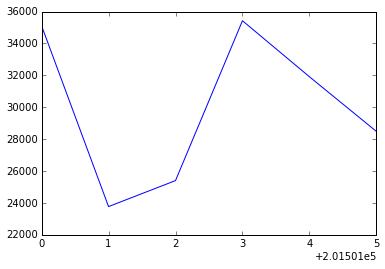

In [34]:
loan_count_summary.plot()

# how to convert 0, 1, 2, 3, 4, 5 to month? 